In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import os

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB


from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_data=pd.read_csv("/content/train.csv")
X_test=pd.read_csv("/content/test.csv")
y_test=pd.read_csv("/content/gender_submission 2.csv")

In [4]:
pd.set_option("display.max_columns",12)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
X_test.shape

(418, 11)

In [7]:
train_data.drop(["PassengerId","Ticket","Cabin","Embarked","Name"],axis=1, inplace=True)
X_test.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1, inplace=True)
y_test.drop(["PassengerId"],axis=1, inplace=True)

In [8]:
train_data["Sex"]=np.where(train_data["Sex"]=="female",1,0)
X_test["Sex"]=np.where(X_test["Sex"]=="female",1,0)

In [9]:
missing_values_percent=100*(train_data.isnull().sum()/len(train_data["Sex"]))
print(missing_values_percent)

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
SibSp        0.00000
Parch        0.00000
Fare         0.00000
dtype: float64


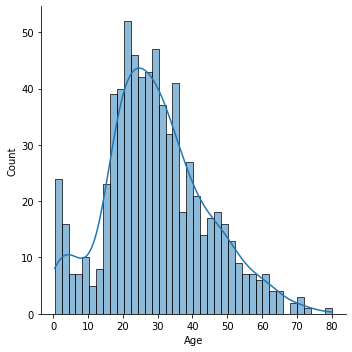

In [10]:
sbn.displot(train_data["Age"],kde=True, bins=40)
plt.show()

In [11]:
train_data["Age"].fillna(train_data["Age"].mean(),inplace=True)

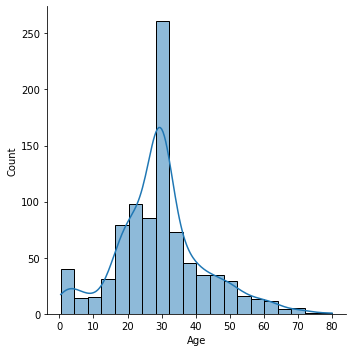

In [12]:
sbn.displot(train_data["Age"],kde=True,bins=20)
plt.show()

In [13]:
missing_values_percent=100*(train_data.isnull().sum()/len(train_data["Sex"]))
print(missing_values_percent)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
dtype: float64


In [14]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

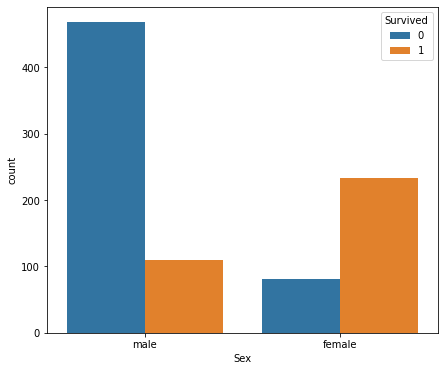

In [15]:
plt.figure(figsize=(7,6))
Datacopy1=train_data.copy()
Datacopy1["Sex"]=Datacopy1["Sex"].replace({1:'female',0:'male'})
sbn.countplot(x="Sex",hue="Survived",data=Datacopy1)
plt.show()

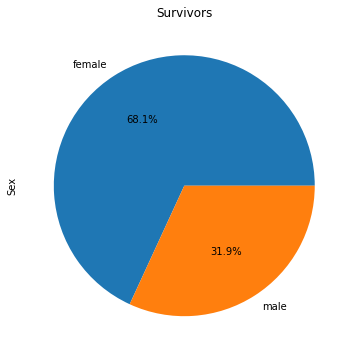

In [16]:
plt.figure(figsize=(6,6))
Yes_Survived_train=Datacopy1.loc[train_data["Survived"]==1]
Yes_Survived_train=Yes_Survived_train["Sex"]
Yes_Survived_train.value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title("Survivors")
plt.show()

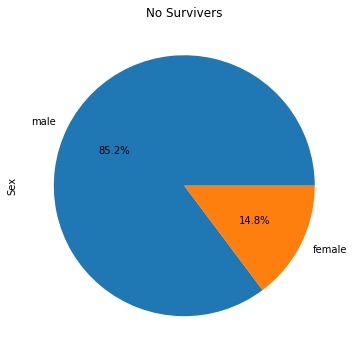

In [17]:
plt.figure(figsize=(6,6))
No_survived_train=Datacopy1.loc[train_data["Survived"]==0]
No_survived_train=No_survived_train["Sex"]
No_survived_train.value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title("No Survivers")
plt.show()

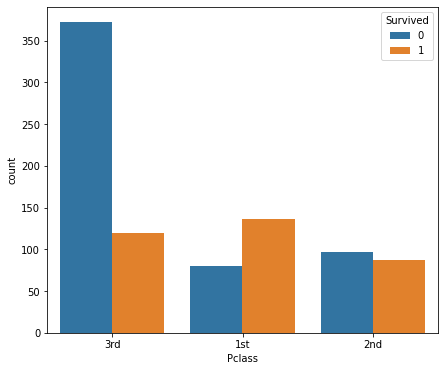

In [18]:
plt.figure(figsize=(7,6))
Datacopy2=train_data.copy()
Datacopy2['Pclass']=Datacopy2['Pclass'].replace({3:"3rd",2:"2nd",1:"1st"})
sbn.countplot(x="Pclass",hue="Survived",data=Datacopy2)
plt.show()

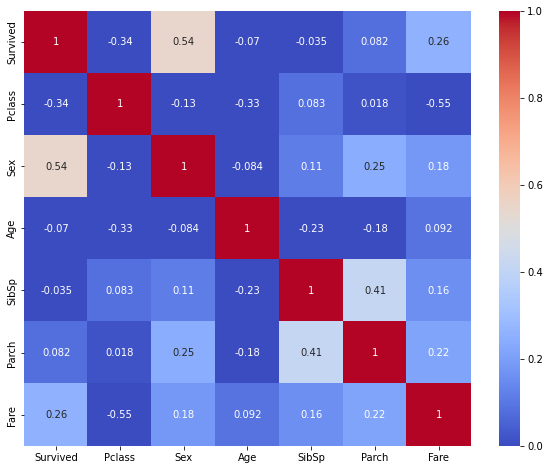

In [19]:
plt.figure(figsize=(10,8))
sbn.heatmap(train_data.corr(),annot=True,vmin=0,cmap="coolwarm")
plt.show()

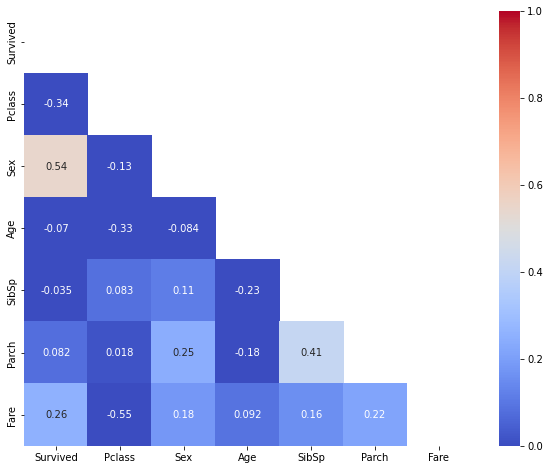

In [20]:
triu=np.triu(train_data.corr())
plt.figure(figsize=(10,8))
sbn.heatmap(train_data.corr(),annot=True,vmin=0,vmax=1,cmap="coolwarm",mask=triu)
plt.show()

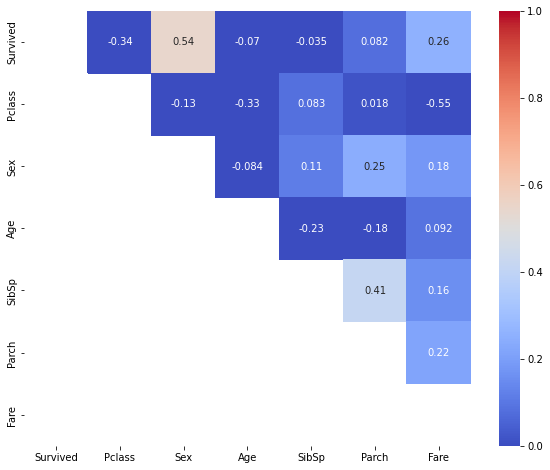

In [21]:
tril=np.tril(train_data.corr())
plt.figure(figsize=(10,8))
sbn.heatmap(train_data.corr(),annot=True,vmin=0,vmax=1,cmap="coolwarm",mask=tril)
plt.show()

In [22]:

y_train=train_data["Survived"]

In [23]:
ModelKNN=KNeighborsClassifier()

In [24]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.699118,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [25]:
K_values=np.array([2,3,5,7,9,11])
metric=["minkowski","chebyshev"]
p=np.array([1,2,3,4])
param_grid={"n_neighbors":K_values,"metric":metric,"p":p}
GridKNN=GridSearchCV(estimator=ModelKNN,param_grid=param_grid,cv=5)
GridKNN.fit(train_data,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': array([ 2,  3,  5,  7,  9, 11]),
                         'p': array([1, 2, 3, 4])})

In [26]:
print(GridKNN.best_score_)
print(GridKNN.best_estimator_.n_neighbors)
print(GridKNN.best_estimator_.metric)
print(GridKNN.best_estimator_.p)

0.8451509635302241
3
minkowski
1


In [27]:
np.any(np.isnan(X_test))
np.any(np.isnan(y_test))

False